# Clasificacion Basica: Predecir una imagen de moda

Esta Guia entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas.

Esta Guia usa [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

In [36]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


## Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [37]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [38]:
train_images.shape

(60000, 28, 28)

In [39]:
train_labels.shape

(60000,)

In [40]:
test_images.shape

(10000, 28, 28)

In [41]:
test_labels.shape

(10000,)

La *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset. Los guardamos en la siguiente lista:

In [42]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore el set de datos

* ¿Cuántas imagenes hay en train?
* ¿Y en test?
* ¿De cuántos pixels se compone cada imagen?
* ¿Cuáles son los valores de los labels?

In [43]:
#1.- ¿Cuántas imagenes hay en train?
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [44]:
#2.- ¿Y en test?
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


In [45]:
#3.- ¿De cuántos pixels se compone cada imagen?
train_images[59999].shape

(28, 28)

In [46]:
#4.- ¿Cuáles son los valores de los labels?
np.unique(train_labels) 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [139]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names, " Dimensión",len(class_names))

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']  Dimensión 10


## Pre-procese el set de datos

Inspecciona y representa la primera imagen del dataset de train. Para ello, utiliza la función `imshow` de matplotlib.

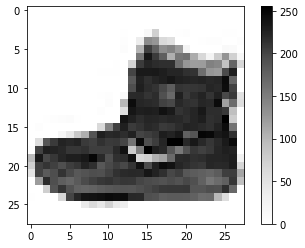

In [146]:
plt.imshow(train_images[0], cmap='Greys')
plt.colorbar()
plt.grid(False)
plt.show();

In [147]:
train_images[0].max(), train_images[0].min()

(255, 0)

Escala los conjuntos de train y test para que vayan del 0 al 1. No hace falta usar ninguna librería. Con realizar una división en cada conjunto será suficiente.

In [53]:
train_images_scalar = train_images.astype('float32')/255
test_images_scalar = test_images.astype('float32')/255


In [54]:
train_images_scalar.max(), train_images_scalar.min()

(1.0, 0.0)

In [56]:
test_images_scalar.max(), test_images_scalar.min()

(1.0, 0.0)

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

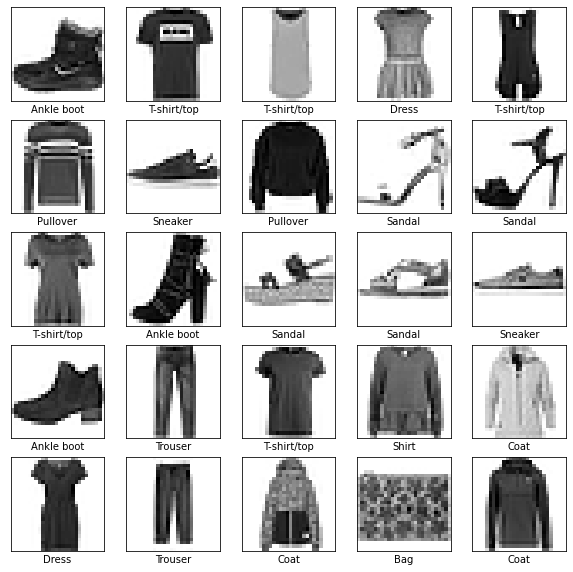

In [57]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_scalar[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

In [152]:
#Declaración de la red neuronal
model = keras.models.Sequential()

#Como tengo imágenes, Flatten aplana en un único vector ==> ES como se hiciera un reshape(-1, 28*28)
#Y especificamos el tamaño de la entrada ==> inputs
model.add(keras.layers.Flatten(input_shape= (28, 28)))

#Capas de la red. "Dense" es la capa de neuronas. Necesitamos número t activación
model.add(keras.layers.Dense(units= 200, #Número de neuronas de la capa
                             activation= 'relu')) #función de activación ==> 'relu'

#Podríamos in

#Capa de salida 'output', con tamaño del número de clases
#Suele ir aquí un 'softmax', por ser un clasificador multiclase. Si fuera binario==> sigmoide
model.add(keras.layers.Dense(10, activation= 'softmax'))

### Configurar las Capas
Construye todas las capas del modelo.

### Compila el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.
* *Optimizer* — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.

Prueba en el posterior entrenamiento varios optimizadores.

Como es un problema de clasificación multiclase, tendrás que usar `sparse_categorical_crossentropy` como función de coste. En cuanto a las métricas, usa simplemente `accuracy`.

In [153]:
model.compile(optimizer= keras.optimizers.Adam(),
              loss= keras.losses.SparseCategoricalCrossentropy(),
              metrics= [keras.metrics.SparseCategoricalAccuracy()]
)

In [154]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


## Entrenar el Modelo
Empieza entrenándolo con 10 epochs. Prueba con más

In [155]:
history = model.fit(train_images_scalar,
                    train_labels,
                    #batch_size= 64, # este parametro es cuando se seleciona el optimizador SGD(), que le indicas con cuantas muestra realizas el optimizador Stochastic Gra
                    epochs= 10
                    )

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6075 - sparse_categorical_accuracy: 0.7883
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3783 - sparse_categorical_accuracy: 0.8611
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3329 - sparse_categorical_accuracy: 0.8786
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3065 - sparse_categorical_accuracy: 0.8874
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2819 - sparse_categorical_accuracy: 0.8944
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2737 - sparse_categorical_accuracy: 0.8995
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2557 - sparse_categorical_accuracy: 0.9055
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2447 - sparse_categorical_accuracy: 0.9071
Epoch 9/10
1875/1875 [==========

In [156]:
history.history['sparse_categorical_accuracy']

[0.8270833492279053,
 0.866599977016449,
 0.8800333142280579,
 0.887666642665863,
 0.8945500254631042,
 0.9004499912261963,
 0.902999997138977,
 0.90625,
 0.9115833044052124,
 0.9140833616256714]

## Evaluar Accuracy
Prueba el rendimiento del modelo con los datos de test

In [168]:
print("Evaluate on test data")

result = model.evaluate(test_images_scalar, test_labels, verbose=2)

Evaluate on test data
313/313 - 0s - loss: 0.3262 - sparse_categorical_accuracy: 0.8884


In [169]:
print("test_loss ", result[0])
print("test_accyarcy ", result[1])

test_loss  0.326193243265152
test_accyarcy  0.8884000182151794


## Hacer predicciones

Con el modelo entrenado puedes usarlo para hacer predicciones sobre imagenes.

In [159]:
predictions = model.predict(test_images_scalar)

El modelo ha predecido la etiqueta para cada imagen en el set de datos de *test* (prueba). Miremos la primera prediccion:

In [160]:
predictions[0].argmax()

9

La predicción de la imagen 1ª es: Ankle boot

La imagen 1ª estaba clasificada como: Ankle boot



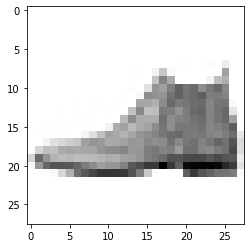

In [161]:
print(f"La predicción de la imagen 1ª es: {class_names[predictions[0].argmax()]}\n")
plt.imshow(test_images[0], cmap='Greys');
print(f"La imagen 1ª estaba clasificada como: {class_names[test_labels[0]]}\n")

*una* prediccion es un array de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Puedes revisar cual tiene el nivel mas alto de confianza:

In [162]:
np.argmax(predictions[0])

9

Entonces, el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificaion es correcta:

In [163]:
test_labels[0]

9

**Grafica** esto para poder ver todo el set de la prediccion de las 10 clases.

In [164]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Miremos la imagen [0], sus predicciones y el array de predicciones. Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega el porcentaje (sobre 100) para la etiqueta predecida.

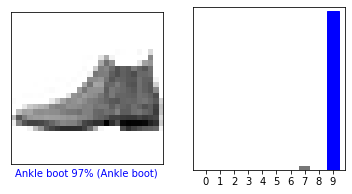

In [165]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

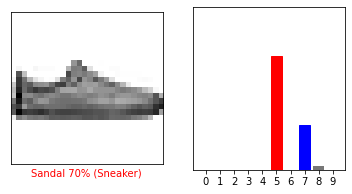

In [166]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

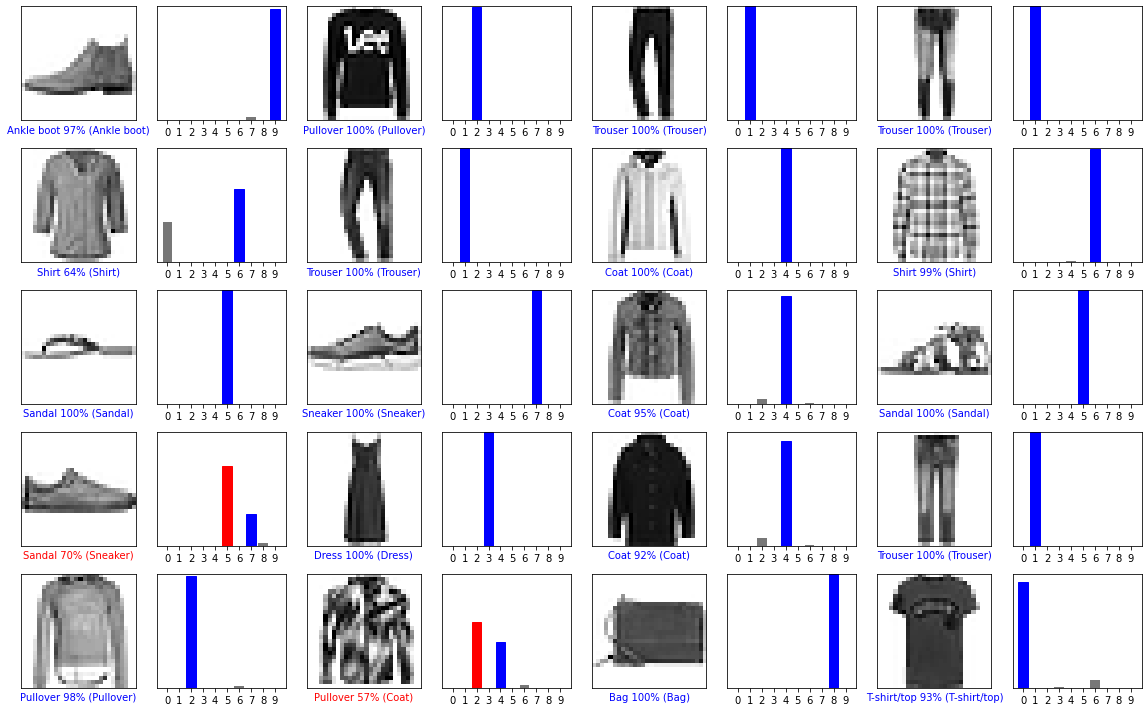

In [170]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.

In [121]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


Los modelos de `tf.keras` son optimizados sobre *batch* o bloques, 
o coleciones de ejemplos por vez.
De acuerdo a esto, aunque use una unica imagen toca agregarla a una lista:

In [122]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Ahora prediga la etiqueta correcta para esta imagen:

In [123]:
predictions_single = model.predict(img)

print(predictions_single)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


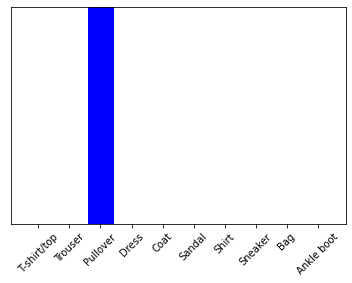

In [124]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` retorna una lista de listas para cada imagen dentro del *batch* o bloque de datos. Tome la prediccion para nuestra unica imagen dentro del *batch* o bloque:

In [125]:
np.argmax(predictions_single[0])

2

Y el modelo predice una etiqueta de 2.